RipOff de https://github.com/yogendranyadav/USA_In_Olympics/

# La France et les JOs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
events = pd.read_csv('./120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
regions = pd.read_csv('./120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [74]:
events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [75]:
events.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [76]:
events.shape

(271116, 15)

In [77]:
events['Medal'].fillna('No Medal', inplace = True)
events.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [78]:
del regions['notes']
regions.rename(columns = {'region':'Country'}, inplace = True)
olympics = events.merge(regions, on = 'NOC', how = 'left')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [79]:
olympics.loc[olympics['Country'].isnull(),['Team','NOC']].drop_duplicates()

,Team,NOC
578,Singapore,SGP
6267,Refugee Olympic Athletes,ROT
44376,June Climene,SGP
61080,Unknown,UNK
64674,Tuvalu,TUV
80986,Rika II,SGP
108582,Singapore-2,SGP
235895,Singapore-1,SGP


### Nettoyage des données

In [80]:
olympics.Country.fillna(olympics.Team, inplace = True)
olympics['Medal'].unique().tolist()
olympics1 = olympics.replace({'Medal':{'Gold': 1,'Silver': 1,'Bronze':1, 'No Medal': 0}})
olympics1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands


In [81]:
summer_olympics = olympics1[olympics.Season == 'Summer']
winter_olympics = olympics1[olympics.Season == 'Winter']

# Revue des pays les plus médaillés

In [82]:
summer_medal_count = summer_olympics[['Country','Medal']].groupby('Country', as_index = False).sum()
summer_medal_count = summer_medal_count[summer_medal_count.Medal>0].sort_values(by = ['Medal'], ascending = False).head(10)
winter_medal_count = winter_olympics[['Country','Medal']].groupby('Country', as_index = False).sum()
winter_medal_count = winter_medal_count[winter_medal_count.Medal>0].sort_values(by = 'Medal', ascending = False).head(10)

print('-'*5,'SUMMER OLYMPICS', '-'*5)
print(summer_medal_count)
print()
print('-'*5,'WINTER OLYMPICS', '-'*5)
print(winter_medal_count)


----- SUMMER OLYMPICS -----
         Country  Medal
198          USA   5002
154       Russia   3188
67       Germany   3126
197           UK   1985
63        France   1627
87         Italy   1446
10     Australia   1333
78       Hungary   1123
182       Sweden   1108
130  Netherlands    918

----- WINTER OLYMPICS -----
            Country  Medal
82           Russia    759
103             USA    635
36          Germany    630
17           Canada    611
73           Norway    443
92           Sweden    428
33          Finland    426
7           Austria    280
93      Switzerland    275
26   Czech Republic    231


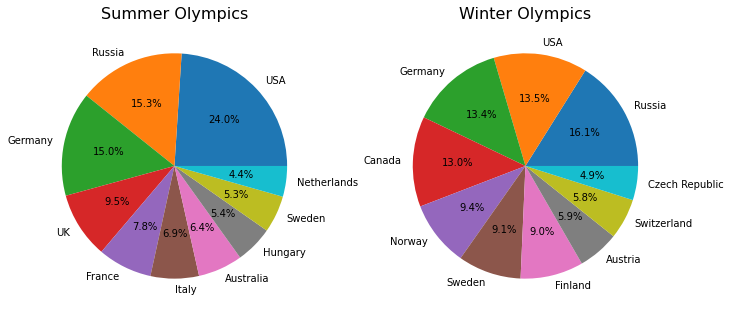

In [83]:
%matplotlib inline

fig,(ax1,ax2) = plt.subplots(1,2)
fig.tight_layout()
fig.set_figheight(12)
fig.set_figwidth(10)
ax1.pie(summer_medal_count.Medal, labels = summer_medal_count.Country, autopct='%1.1f%%')
ax1.set_title('Summer Olympics', fontsize = 16)
ax2.pie(winter_medal_count.Medal, labels = winter_medal_count.Country, autopct='%1.1f%%')
ax2.set_title('Winter Olympics', fontsize = 16)
# ax.axis('equal')

plt.show()

#  Revue pour la France

In [84]:
FR = olympics1[olympics1.Country == 'France']
summer_FR = FR[FR.Season == 'Summer']
summer_FR.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",0,France
145,52,Patrick Abada,M,22.0,189.0,80.0,France,FRA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Pole Vault,0,France
149,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Individual",0,France
150,56,Ren Abadie,M,21.0,NaN,NaN,France,FRA,1956 Summer,1956,Summer,Melbourne,Cycling,"Cycling Men's Road Race, Team",1,France
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,1,France


In [85]:
winter_FR = FR[FR.Season == 'Winter']

In [86]:
winter_FR.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
778,448,Sarah Abitbol,F,22.0,150.0,43.0,France-1,FRA,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Pairs,0,France
1187,665,Gilbert Achard-Picard,M,29.0,NaN,NaN,France-2,FRA,1948 Winter,1948,Winter,Sankt Moritz,Bobsleigh,Bobsleigh Men's Four,0,France
1641,911,Antoine Adelisse,M,17.0,178.0,65.0,France,FRA,2014 Winter,2014,Winter,Sochi,Freestyle Skiing,Freestyle Skiing Men's Slopestyle,0,France
2102,1171,Benjamin Agnel,M,20.0,175.0,75.0,France,FRA,1994 Winter,1994,Winter,Lillehammer,Ice Hockey,Ice Hockey Men's Ice Hockey,0,France
2103,1172,Marysette Agnel,F,25.0,NaN,NaN,France,FRA,1952 Winter,1952,Winter,Oslo,Alpine Skiing,Alpine Skiing Women's Downhill,0,France


In [87]:
summer_FR_years = summer_FR[['Year', 'Medal']].groupby('Year', as_index = False).sum()
summer_event_count = summer_FR.groupby('Year')['Event'].nunique().reset_index()
winter_FR_years = winter_FR[['Year', 'Medal']].groupby('Year', as_index = False).sum()
winter_event_count = winter_FR.groupby('Year')['Event'].nunique().reset_index()
summer_FR_years.head()

,Year,Medal
0,1896,11
1,1900,235
2,1904,2
3,1906,64
4,1908,40


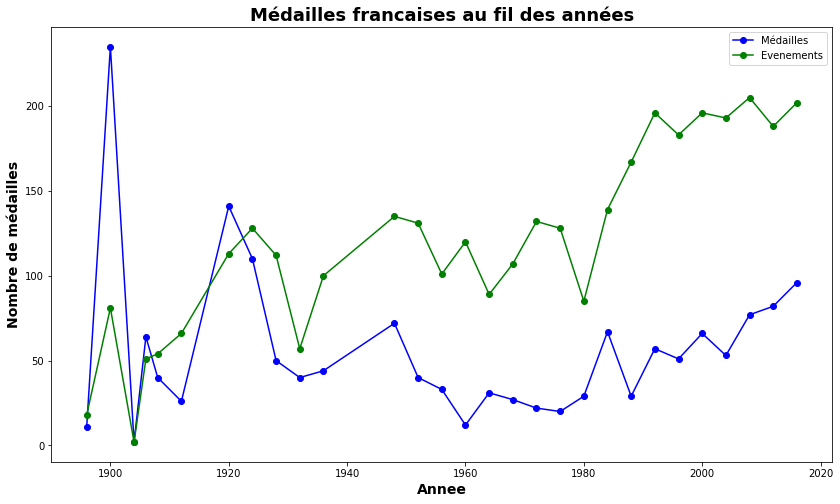

In [88]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (14,8))
plt.plot(summer_FR_years['Year'].values, summer_FR_years['Medal'].values, color = 'blue', marker = 'o', label = 'Médailles')
plt.plot(summer_event_count['Year'].values, summer_event_count['Event'].values, color = 'green', marker = 'o', label = 'Evenements')
plt.xlabel('Annee',  fontweight = 'bold', fontsize = 14)
plt.ylabel('Nombre de médailles', fontweight = 'bold',fontsize = 14)
plt.legend()
plt.title('Médailles francaises au fil des années', fontweight = 'bold', fontsize = 18)
plt.show()


## Médailles francaises aux jeux d'été

-------------------------Summer Olympics-------------------

              Sport  Events per Sport  Gold  Silver  Bronze
0           Archery                19   7.0    25.0    16.0
1  Art Competitions                19   6.0     4.0     5.0
2         Athletics                68  14.0    40.0    62.0
3         Badminton                 4   0.0     0.0     0.0
4        Basketball                 2   0.0    38.0     0.0


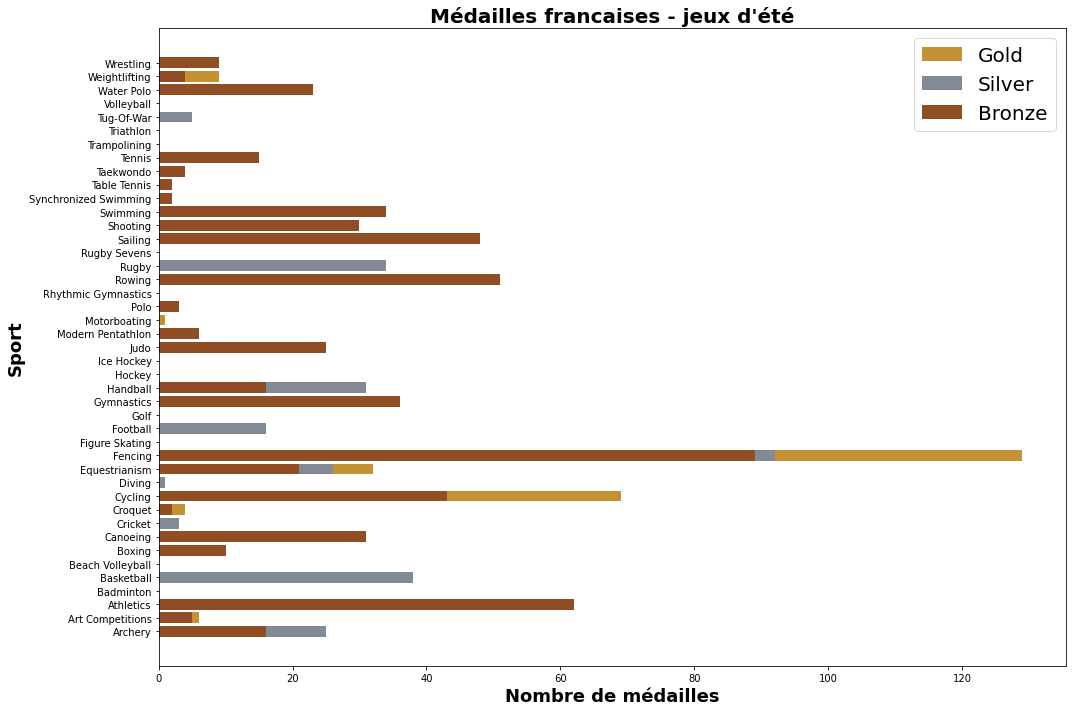

In [89]:
from functools import reduce

FR_gold_summer = olympics[(olympics['Country'] == 'France') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Gold')]
FR_silver_summer = olympics[(olympics['Country'] == 'France') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Silver')]
FR_bronze_summer = olympics[(olympics['Country'] == 'France') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'Bronze')]
FR_nm_summer = olympics[(olympics['Country'] == 'France') & (olympics['Season'] == 'Summer') & (olympics['Medal'] == 'No Medal')]



FR_gold = FR_gold_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Gold'})
FR_silver = FR_silver_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Silver'})
FR_bronze = FR_bronze_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Bronze'})
events_per_sport = summer_FR.groupby('Sport')['Event'].nunique() \
                    .reset_index() \
                    .rename(columns = {'Event': 'Events per Sport'})
                            
dataframe = [events_per_sport,FR_gold, FR_silver, FR_bronze]
FR_medals_summer = reduce(lambda left,right: pd.merge(left, right, on = 'Sport', how = 'outer'), \
                        dataframe).fillna(0)

print('-------------------------Summer Olympics-------------------')
print()
print(FR_medals_summer.head())


fig,ax = plt.subplots(figsize = (15,10))
plt.barh(FR_medals_summer.Sport.values, FR_medals_summer.Gold.values, color = '#C49133', label = 'Gold')
plt.barh(FR_medals_summer.Sport.values, FR_medals_summer.Silver.values, color = '#828A95', label = 'Silver')
plt.barh(FR_medals_summer.Sport.values, FR_medals_summer.Bronze.values, color = '#914E24', label = 'Bronze')
plt.title("Médailles francaises - jeux d'été", fontweight = 'bold', fontsize=20)
plt.xlabel('Nombre de médailles', fontsize = 18, fontweight = 'bold')
plt.ylabel('Sport', fontsize = 18, fontweight = 'bold')
plt.legend(fontsize = 20)
plt.tight_layout()
plt.show()

In [117]:
from functools import reduce
dfOlymp_year = olympics[olympics.Year >= 2000]
FR_gold_summer = dfOlymp_year[(dfOlymp_year['Country'] == 'France') & (dfOlymp_year['Season'] == 'Summer') & (dfOlymp_year['Medal'] == 'Gold')]
FR_silver_summer = dfOlymp_year[(dfOlymp_year['Country'] == 'France') & (dfOlymp_year['Season'] == 'Summer') & (dfOlymp_year['Medal'] == 'Silver')]
FR_bronze_summer = dfOlymp_year[(dfOlymp_year['Country'] == 'France') & (dfOlymp_year['Season'] == 'Summer') & (dfOlymp_year['Medal'] == 'Bronze')]
FR_nm_summer = dfOlymp_year[(dfOlymp_year['Country'] == 'France') & (dfOlymp_year['Season'] == 'Summer') & (dfOlymp_year['Medal'] == 'No Medal')]



FR_gold = FR_gold_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Gold'})
FR_silver = FR_silver_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Silver'})
FR_bronze = FR_bronze_summer[['Sport','Medal']].groupby('Sport', as_index = False).count() \
            .rename(columns = {'Medal':'Bronze'})
events_per_sport = summer_FR.groupby('Sport')['Event'].nunique() \
                    .reset_index() \
                    .rename(columns = {'Event': 'Events per Sport'})
                            
dataframe = [events_per_sport,FR_gold, FR_silver, FR_bronze]
FR_medals_summer = reduce(lambda left,right: pd.merge(left, right, on = 'Sport', how = 'outer'), \
                        dataframe).fillna(0)

print('-------------------------Summer dfOlymp_year-------------------')
print()
print(FR_medals_summer.head())



-------------------------Summer dfOlymp_year-------------------

              Sport  Events per Sport  Gold  Silver  Bronze
0           Archery                19   0.0     1.0     3.0
1  Art Competitions                19   0.0     0.0     0.0
2         Athletics                68   1.0     5.0    13.0
3         Badminton                 4   0.0     0.0     0.0
4        Basketball                 2   0.0    24.0     0.0


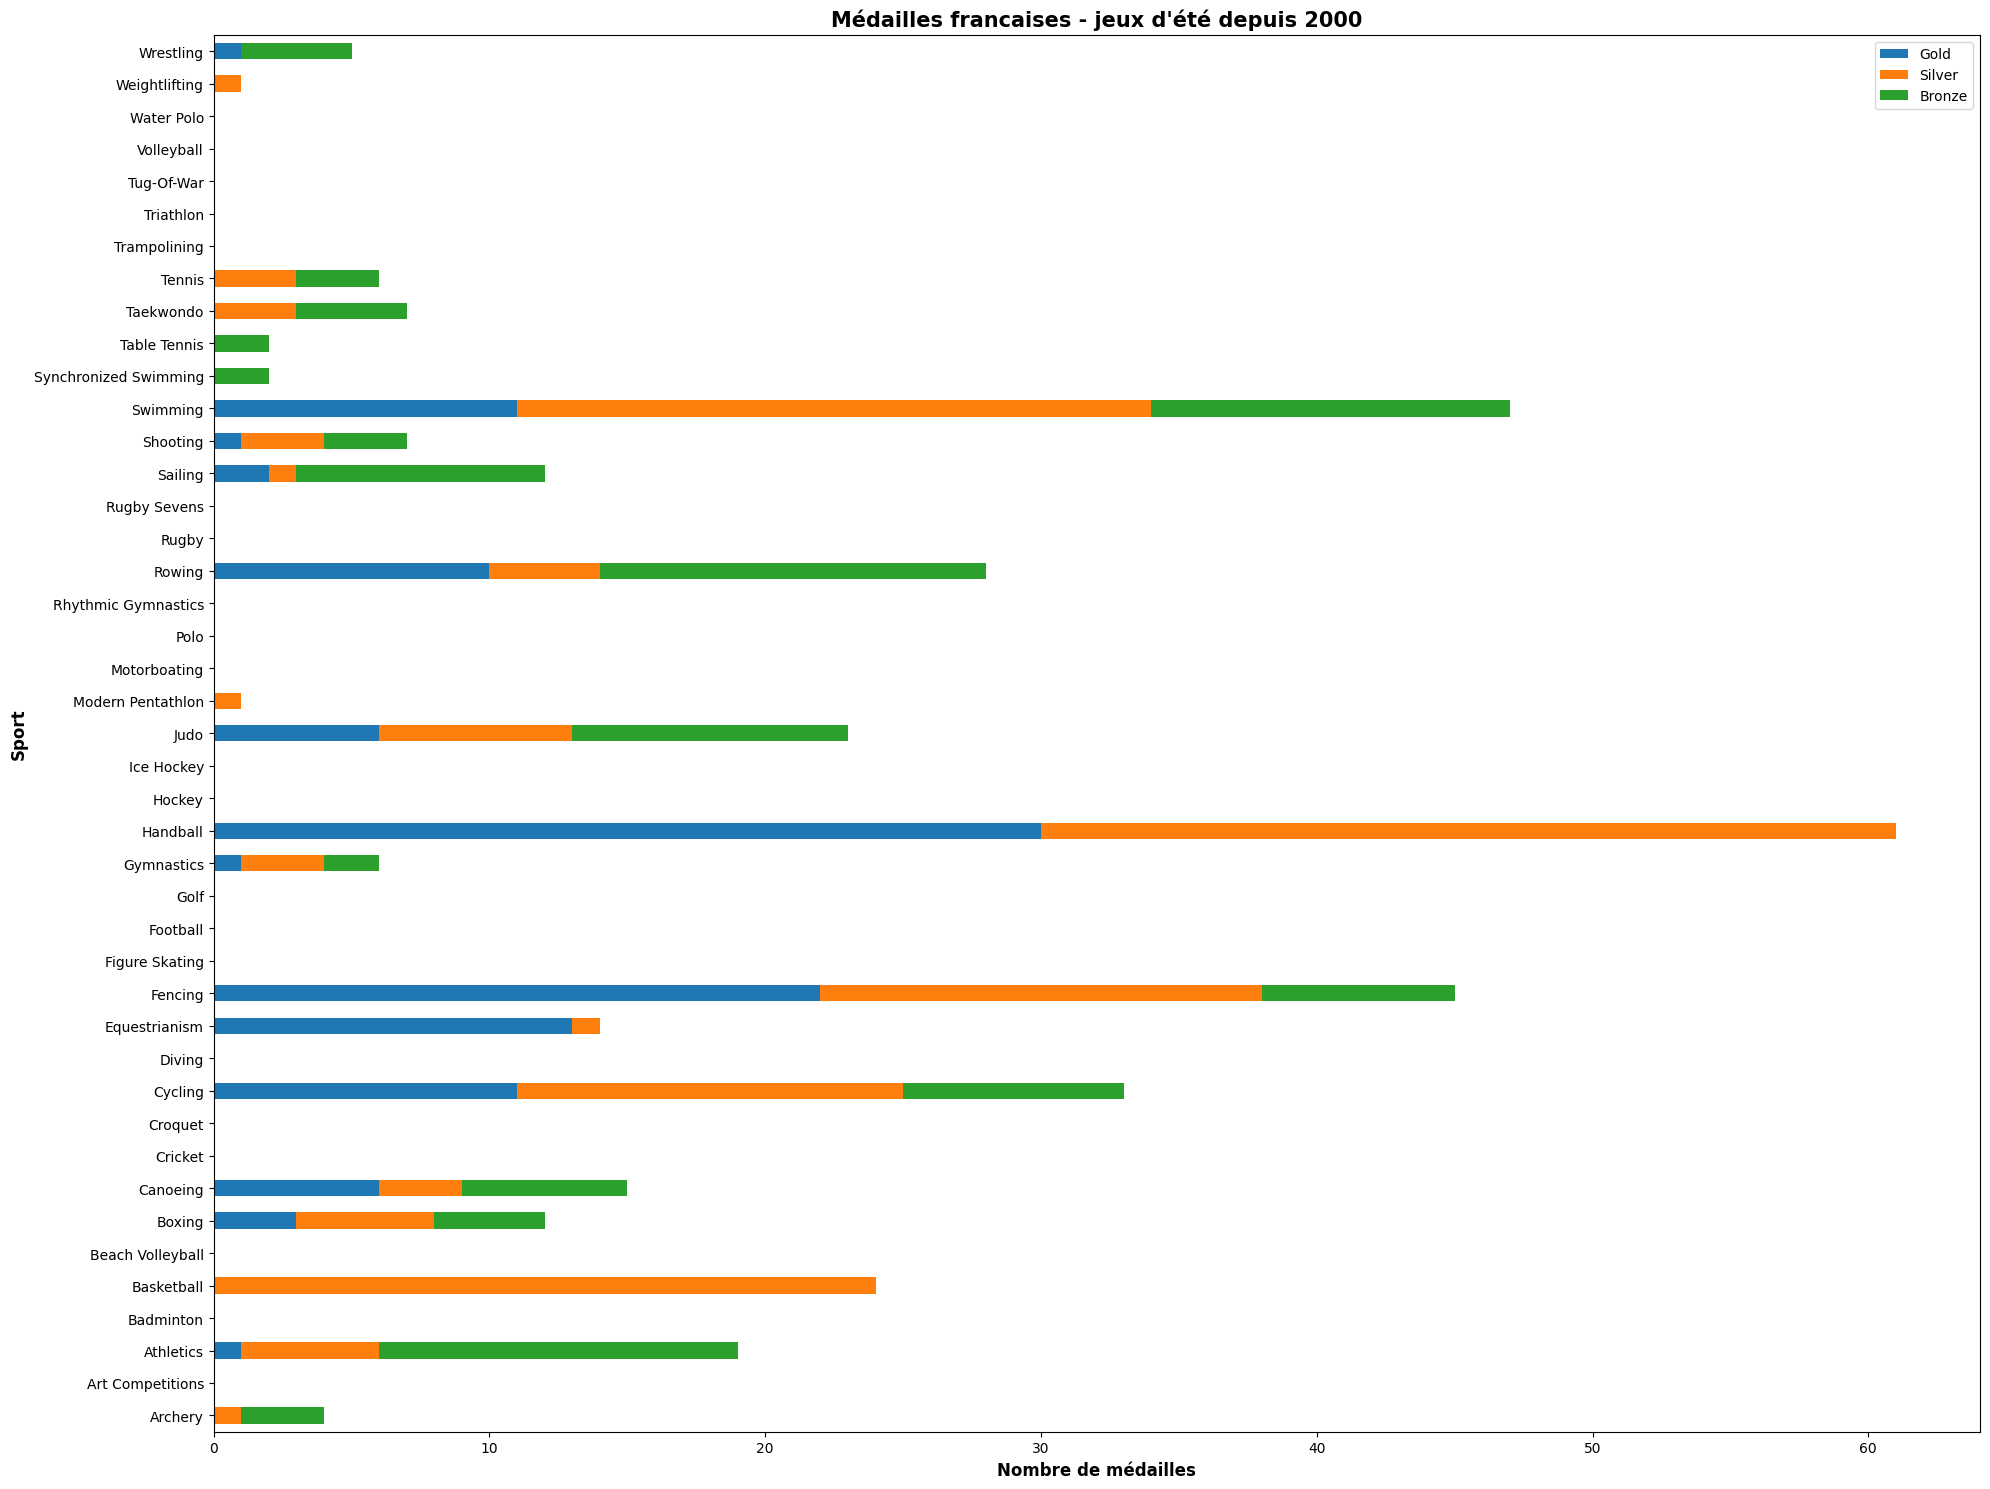

In [118]:
fig, ax = plt.subplots(figsize=(20, 15))

FR_medals_summer[["Gold","Silver","Bronze"]].plot.barh(stacked = True, ax=ax)
ax.set_yticklabels(FR_medals_summer.Sport);

plt.title("Médailles francaises - jeux d'été depuis 2000", fontweight = 'bold', fontsize=15)
plt.xlabel('Nombre de médailles', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sport', fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [119]:
FR_medals_summer

,Sport,Events per Sport,Gold,Silver,Bronze
0,Archery,19,0.0,1.0,3.0
1,Art Competitions,19,0.0,0.0,0.0
2,Athletics,68,1.0,5.0,13.0
3,Badminton,4,0.0,0.0,0.0
4,Basketball,2,0.0,24.0,0.0
5,Beach Volleyball,2,0.0,0.0,0.0
6,Boxing,14,3.0,5.0,4.0
7,Canoeing,26,6.0,3.0,6.0
8,Cricket,1,0.0,0.0,0.0
9,Croquet,3,0.0,0.0,0.0


# Exploration des joueurs francais 

In [92]:
olympics.keys()

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Country'],
      dtype='object')

In [93]:
athletesFR = olympics[(olympics.Country == "France") & (olympics.Year >= 2000)]
print(len(athletesFR),"athlètes repérés")
athletesFR

3049 athlètes repérés


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",No Medal,France
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France
199,93,Jol Marc Abati,M,34.0,190.0,85.0,France,FRA,2004 Summer,2004,Summer,Athina,Handball,Handball Men's Handball,No Medal,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268245,134209,Gary Zebrowski,M,25.0,179.0,76.0,France,FRA,2010 Winter,2010,Winter,Vancouver,Snowboarding,Snowboarding Men's Halfpipe,No Medal,France
268653,134401,Mickal-Meba Zz,M,22.0,175.0,66.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,No Medal,France
270450,135278,Vincent Zouaoui-Dandrieux,M,27.0,188.0,72.0,France,FRA,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 3,000 metres Steeplechase",No Medal,France
270451,135278,Vincent Zouaoui-Dandrieux,M,31.0,188.0,72.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 3,000 metres Steeplechase",No Medal,France
